#### Linear Regression From Scratch (only Numpy)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#### CREATE SIMPLE LINEAR REGRESSION CLASS 
class SimpleLinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
      ## Initialize all the hyper-parameter
        self.learning_rate=learning_rate
        self.max_iterations=max_iterations
        self.weights=None
        self.bias=None
        self.loss_history=[]

    def predict(self, X):
      ### Predict functiion 
        return X @ self.weights + self.bias

    def calculate_loss(self, X, y):
      ### Calculate Mean Square Error
        predictions = self.predict(X)
        mse = np.mean((y - predictions) ** 2)
        return mse

    def calculate_r2(self, X, y):
      #### Calculate R2 score
        predictions = self.predict(X)
        ss_res = np.sum((y - predictions) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2


In [ ]:
### Import batch gradient descent , mini batch , stochastic and also import the visualize funtion
import batch_GD,SGD,mini_batch_GD,sample_data,visualize_result




In [5]:
### this is the function where we comapre all methods and also train the model

def compare_all_methods():

    print("="*60)
    print("COMPARING ALL GRADIENT DESCENT METHODS")
    print("="*60)

    # Create sample data
    X, y, true_weights, true_bias = sample_data.create_sample_data(n_samples=1000, n_features=3)

    # Split data into train and test
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Normalize data
    X_train_norm, X_test_norm = sample_data.normalize_data(X_train, X_test)

    # Set hyperparameters
    learning_rate = 0.01
    max_iterations = 500
    batch_size = 32

    # Train with different methods
    print("\n1. BATCH GRADIENT DESCENT")
    print("-" * 30)
    weights_batch, bias_batch, loss_batch = batch_GD.batch_gradient_descent(
        X_train_norm, y_train, learning_rate, max_iterations
    )

    print("\n2. STOCHASTIC GRADIENT DESCENT")
    print("-" * 30)
    weights_sgd, bias_sgd, loss_sgd = SGD.stochastic_gradient_descent(
        X_train_norm, y_train, learning_rate, max_iterations
    )

    print("\n3. MINI-BATCH GRADIENT DESCENT")
    print("-" * 30)
    weights_mini, bias_mini, loss_mini = mini_batch_GD.mini_batch_gradient_descent(
        X_train_norm, y_train, learning_rate, max_iterations, batch_size
    )

    # Calculate final scores
    def calculate_score(X, y, weights, bias):
        predictions = X @ weights + bias
        r2 = 1 - np.sum((y - predictions) ** 2) / np.sum((y - np.mean(y)) ** 2)
        return r2

    print("\n" + "="*60)
    print("FINAL RESULTS")
    print("="*60)

    # Batch GD Results
    r2_batch = calculate_score(X_test_norm, y_test, weights_batch, bias_batch)
    print(f"Batch GD - R² Score: {r2_batch:.4f}")
    print(f"Batch GD - Final Loss: {loss_batch[-1]:.6f}")
    print(f"Batch GD - Learned weights: {weights_batch}")
    print(f"Batch GD - Learned bias: {bias_batch:.4f}")

    # SGD Results
    r2_sgd = calculate_score(X_test_norm, y_test, weights_sgd, bias_sgd)
    print(f"\nSGD - R² Score: {r2_sgd:.4f}")
    print(f"SGD - Final Loss: {loss_sgd[-1]:.6f}")
    print(f"SGD - Learned weights: {weights_sgd}")
    print(f"SGD - Learned bias: {bias_sgd:.4f}")

    # Mini-batch GD Results
    r2_mini = calculate_score(X_test_norm, y_test, weights_mini, bias_mini)
    print(f"\nMini-batch GD - R² Score: {r2_mini:.4f}")
    print(f"Mini-batch GD - Final Loss: {loss_mini[-1]:.6f}")
    print(f"Mini-batch GD - Learned weights: {weights_mini}")
    print(f"Mini-batch GD - Learned bias: {bias_mini:.4f}")

    print(f"\nTrue weights: {true_weights}")
    print(f"True bias: {true_bias:.4f}")

    return {
        'batch': (weights_batch, bias_batch, loss_batch),
        'sgd': (weights_sgd, bias_sgd, loss_sgd),
        'mini_batch': (weights_mini, bias_mini, loss_mini)
    }



LINEAR REGRESSION METHODS:
--------------------------------------------------
COMPARING ALL GRADIENT DESCENT METHODS
Creating sample data with 1000 samples and 3 features...
True weights: [ 1.5 -2.   0.5]
True bias: 0.5
Normalizing data...

1. BATCH GRADIENT DESCENT
------------------------------
TTRAINING LINEAR REG. WITH BATCH GRADIENT DESCENT----
Iteration 0: Loss = 6.962772
Iteration 100: Loss = 0.127336
Iteration 200: Loss = 0.012589
Iteration 300: Loss = 0.010607
Iteration 400: Loss = 0.010572

2. STOCHASTIC GRADIENT DESCENT
------------------------------
Training with Stochastic Gradient Descent...
Epoch 0: Loss = 0.234952
Epoch 100: Loss = 0.011135
Epoch 200: Loss = 0.010943
Epoch 300: Loss = 0.011092
Epoch 400: Loss = 0.011026

3. MINI-BATCH GRADIENT DESCENT
------------------------------
Training with Mini-batch Gradient Descent (batch size: 32)...
Epoch 0: Loss = 4.493630
Epoch 100: Loss = 0.010591
Epoch 200: Loss = 0.010600
Epoch 300: Loss = 0.010596
Epoch 400: Loss = 0.010

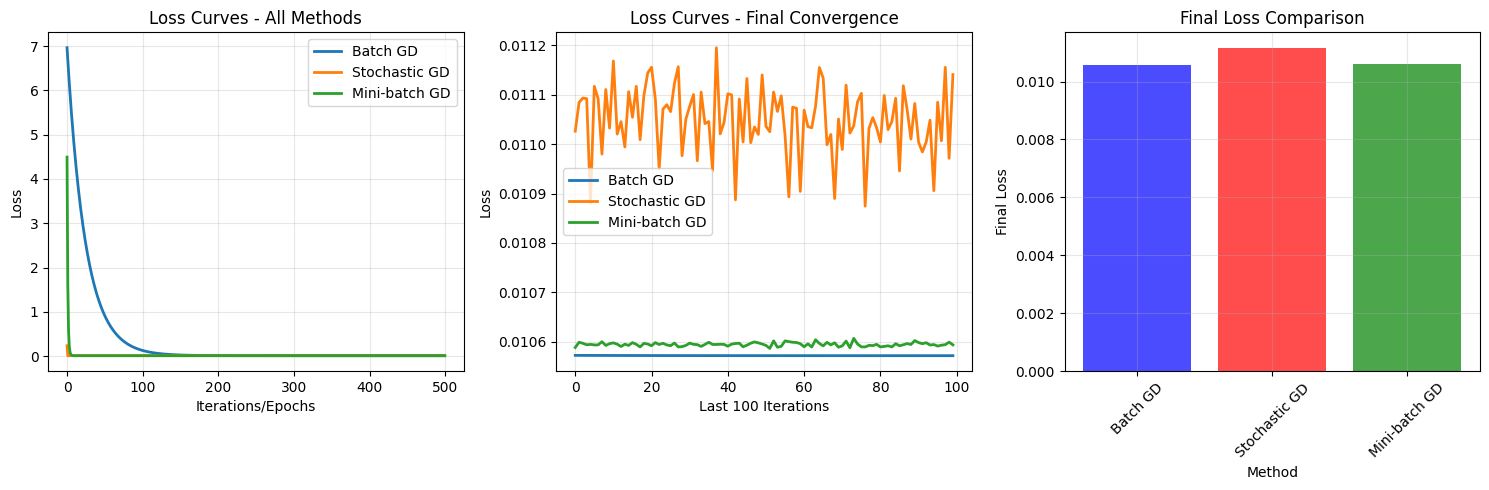

In [7]:
def main():
    '''  
    THIS IS THE FUNCTION WHERE WE APPLY ALL METHOD
    '''
    print('LINEAR REGRESSION METHODS:')
    print('-'*50)
    results=compare_all_methods()
    visualize_result.plot_results(results)
## main function 
main()